# Import Libraries and Load the Data

In [1]:
#import basic libraries 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
#from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data 
data=pd.read_csv('data.csv',index_col=0)
data.head(9)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0
6,105,8,1,34.0,0,1,14,31,19,12,3,1,0,0
7,13,8,1,37.0,1,0,14,31,19,12,3,1,6,0
8,13,8,1,39.0,1,0,14,31,19,12,3,1,5,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


In [4]:
data.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


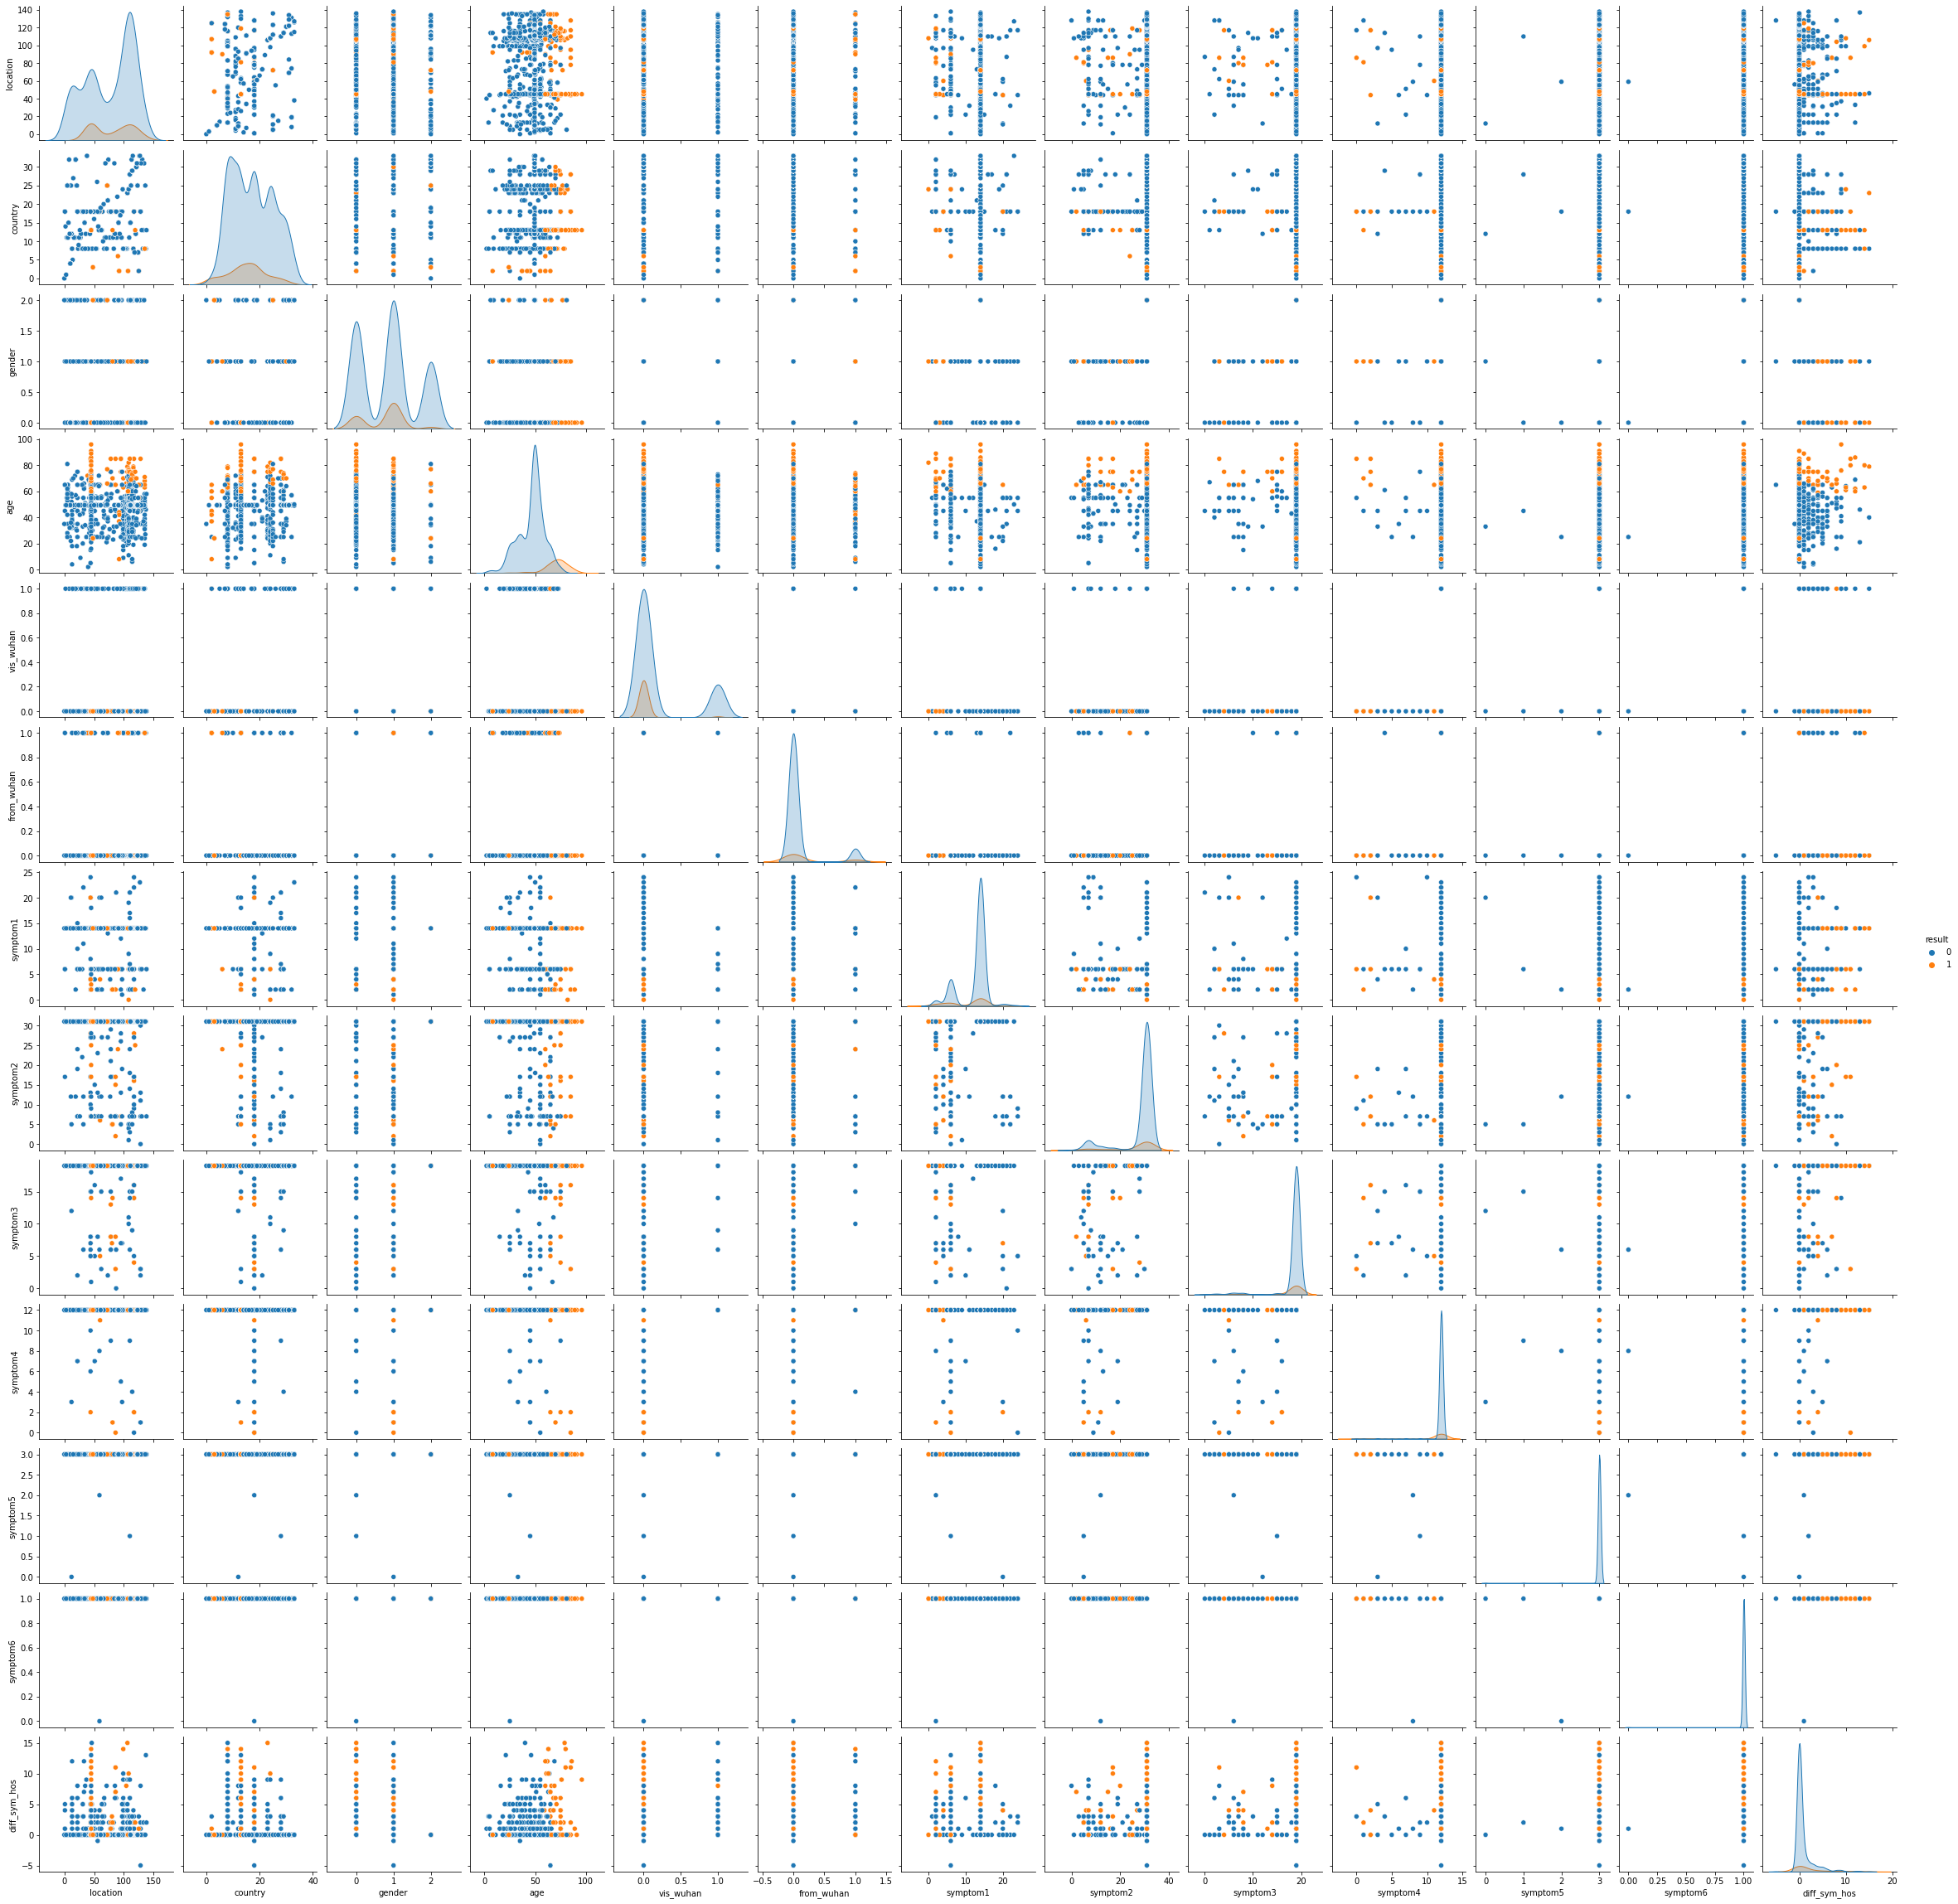

In [5]:
sns.pairplot(data=data,hue='result')

Text(0.5, 1.0, 'Correlation Matrix')

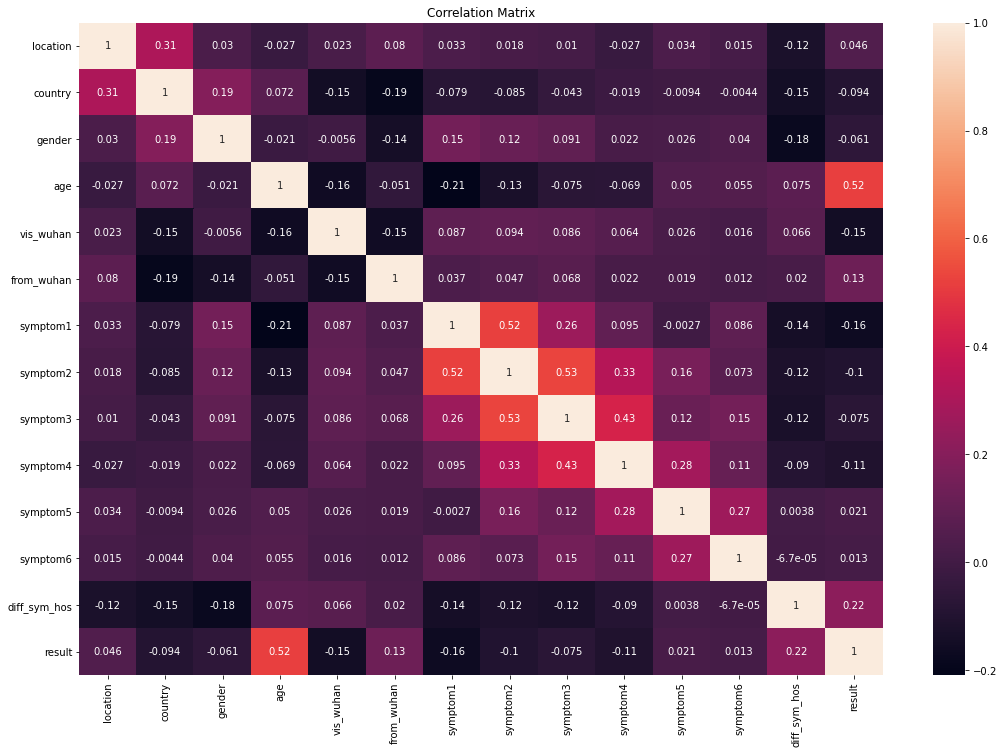

In [6]:
plt.rcParams["figure.figsize"] = (18,12) # Custom figure size in inches
sns.heatmap(data.corr(), annot =True)
plt.title('Correlation Matrix')

# Splitting data

In [58]:
x=data.iloc[:,:-1]
y= data[['result']]

In [59]:
#Splitting data to train ,validation and Test (80,10,10)
X_train, X_both, y_train, y_both = train_test_split(x, y,stratify=y, test_size = 0.2, random_state=3)
X_test, X_valid, y_test, y_valid = train_test_split(X_both, y_both, test_size = 0.5, random_state=3)

# Models



# 1. K-Nearest Neighbors

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        77
           1       0.86      0.60      0.71        10

    accuracy                           0.94        87
   macro avg       0.90      0.79      0.84        87
weighted avg       0.94      0.94      0.94        87

confusion_matrix:[[76  1]
 [ 4  6]]
f1_score=0.7058823529411764


In [61]:
#find the optimal hyperparameters knn
l = []
# Loop over K values
for i, k in enumerate(np.arange(1, 10)):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_score(knn, X_train, y_train, cv=40).mean()
    l.append(y_pred)
    if y_pred >= max(l):
        maxn = k
    
print(f"The optimal k is {maxn} with value {max(l)}")  

The optimal k is 7 with value 0.9391339869281046


In [72]:
#Validation with the optimal k
knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'brute')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        77
           1       0.88      0.70      0.78        10

    accuracy                           0.95        87
   macro avg       0.92      0.84      0.88        87
weighted avg       0.95      0.95      0.95        87

confusion_matrix:[[76  1]
 [ 3  7]]
f1_score=0.7777777777777777


# 2. Logistic Regression

In [73]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       1.00      0.90      0.95        10

    accuracy                           0.99        87
   macro avg       0.99      0.95      0.97        87
weighted avg       0.99      0.99      0.99        87

confusion_matrix:[[77  0]
 [ 1  9]]
f1_score=0.9473684210526316


In [74]:
#find the optimal hyperparameters
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['none','l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}
LR_search = GridSearchCV(LR, param_grid = LRparam_grid, refit = True, verbose = 1, cv=17)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)

all_param = []
all_param= list(LR_search.best_params_.values())

lr = LogisticRegression(C= all_param[0] , penalty= all_param[1], solver= all_param[2])
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)

Fitting 17 folds for each of 36 candidates, totalling 612 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 612 out of 612 | elapsed:    6.9s finished


In [75]:
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       1.00      0.80      0.89        10

    accuracy                           0.98        87
   macro avg       0.99      0.90      0.94        87
weighted avg       0.98      0.98      0.98        87

confusion_matrix:[[77  0]
 [ 2  8]]
f1_score=0.888888888888889


# 3. Naïve Bayes


In [76]:
gb = GaussianNB()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_valid)
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       0.85      0.14      0.24        77
           1       0.11      0.80      0.19        10

    accuracy                           0.22        87
   macro avg       0.48      0.47      0.22        87
weighted avg       0.76      0.22      0.24        87

confusion_matrix:[[11 66]
 [ 2  8]]
f1_score=0.19047619047619047


In [77]:
#find the optimal hyperparameters
g=GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=g, param_grid = params_NB, verbose=1, scoring='accuracy') 
gs_NB.fit(X_train, y_train)

var_value = gs_NB.best_params_.get('var_smoothing')
gb = GaussianNB(var_smoothing = var_value)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_valid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished


In [78]:
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        77
           1       1.00      0.50      0.67        10

    accuracy                           0.94        87
   macro avg       0.97      0.75      0.82        87
weighted avg       0.95      0.94      0.93        87

confusion_matrix:[[77  0]
 [ 5  5]]
f1_score=0.6666666666666666


# 4. Decision Trees

In [79]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_valid)
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        77
           1       0.83      1.00      0.91        10

    accuracy                           0.98        87
   macro avg       0.92      0.99      0.95        87
weighted avg       0.98      0.98      0.98        87

confusion_matrix:[[75  2]
 [ 0 10]]
f1_score=0.9090909090909091


In [80]:
#find the optimal hyperparameters
dtreeparam_grid = {
    'max_depth': np.arange(1,17),
    'max_features': np.arange(1,17),
    'random_state': [0]
}
dtree_search = GridSearchCV(dtree, param_grid = dtreeparam_grid, refit = True, verbose = 1, cv=20)
dtree_search.fit(X_train , y_train)

all_param = []
all_param = list(dtree_search.best_params_.values())

dtree = DecisionTreeClassifier(criterion = "entropy", max_depth= all_param[0], max_features =all_param[1], random_state=3)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_valid)

Fitting 20 folds for each of 256 candidates, totalling 5120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5120 out of 5120 | elapsed:   22.1s finished


In [81]:
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        77
           1       0.82      0.90      0.86        10

    accuracy                           0.97        87
   macro avg       0.90      0.94      0.92        87
weighted avg       0.97      0.97      0.97        87

confusion_matrix:[[75  2]
 [ 1  9]]
f1_score=0.8571428571428572


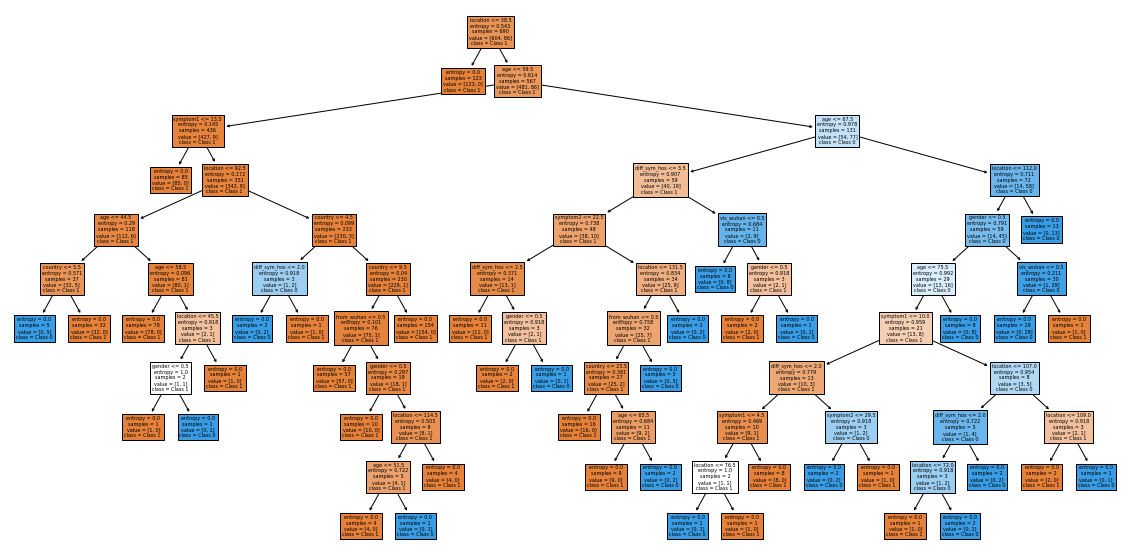

In [82]:
from sklearn import tree
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(dtree,feature_names=list(X_train.columns),  
                   class_names=['Class 1 ','Class 0'],
                   filled=True)
fig.savefig("decistion_tree.png")

# 5. Support Vector Machines

In [83]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")
print(f"recall_score:{recall_score(y_valid, y_pred)}")

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        77
           1       1.00      0.70      0.82        10

    accuracy                           0.97        87
   macro avg       0.98      0.85      0.90        87
weighted avg       0.97      0.97      0.96        87

confusion_matrix:[[77  0]
 [ 3  7]]
f1_score=0.8235294117647058
recall_score:0.7


In [84]:
#find the optimal hyperparameters
svcparam_grid = {'kernel': ['poly','rbf','sigmoid'], 'degree': np.arange(1,4), 'random_state':[1], 'C': np.arange(0,2), 'gamma':['scale', 'auto'] }
svc_search = GridSearchCV(svc, param_grid = svcparam_grid, refit = True, verbose = 1, cv=5)
svc_search.fit(X_train , y_train)
svc_search.best_params_

all_param = []
all_param = list(svc_search.best_params_.values())

svc = SVC(C =all_param[0], degree= all_param[1], gamma=all_param[2], kernel = all_param[3], random_state=3)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   19.5s finished


In [85]:
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       1.00      0.90      0.95        10

    accuracy                           0.99        87
   macro avg       0.99      0.95      0.97        87
weighted avg       0.99      0.99      0.99        87

confusion_matrix:[[77  0]
 [ 1  9]]
f1_score=0.9473684210526316


# Testing

# 1- KNN

In [86]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(f"confusion_matrix:{confusion_matrix(y_test, y_pred_knn)}")
print(f"f1_score={f1_score(y_test, y_pred_knn, average='binary')}")
print(f"roc_auc_score={roc_auc_score(y_test.to_numpy(), y_pred_knn)}")

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        74
           1       0.60      0.75      0.67        12

    accuracy                           0.90        86
   macro avg       0.78      0.83      0.80        86
weighted avg       0.91      0.90      0.90        86

confusion_matrix:[[68  6]
 [ 3  9]]
f1_score=0.6666666666666665
roc_auc_score=0.8344594594594593


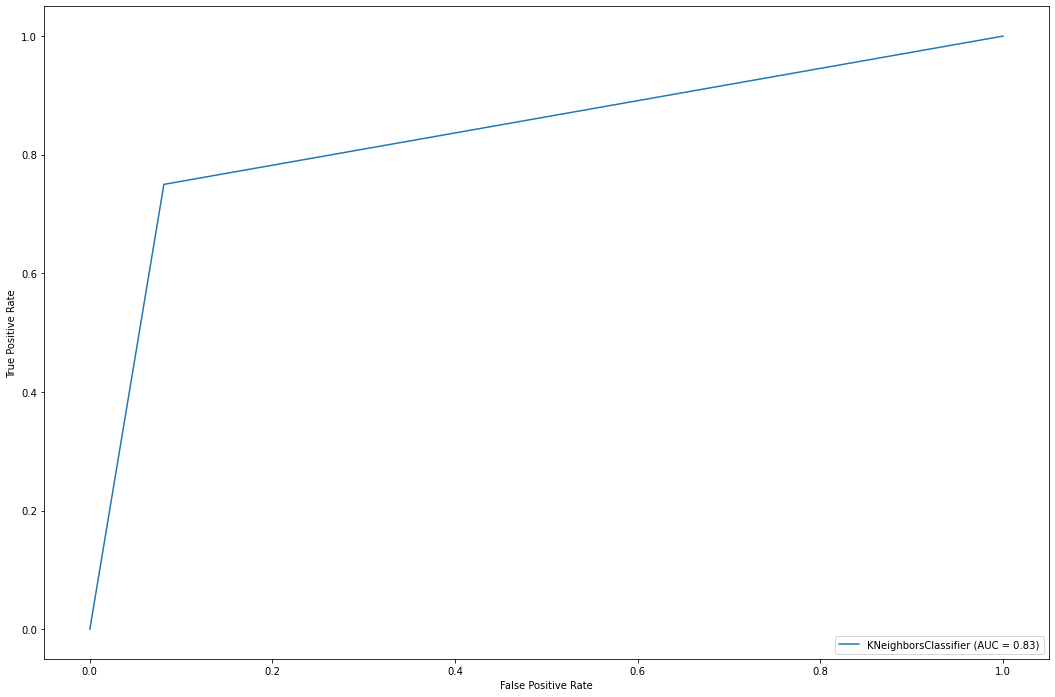

In [87]:
metrics.plot_roc_curve(knn, X_test, y_test)
plt.show()

# 2- Logistic Regression

In [88]:
 y_pred_log = lr.predict(X_test)
print(classification_report(y_test,  y_pred_log))
print(f"confusion_matrix:{confusion_matrix(y_test,  y_pred_log)}")
print(f"f1_score={f1_score(y_test,  y_pred_log, average='binary')}")
print(f"roc_auc_score={roc_auc_score(y_test.to_numpy(), y_pred_log)}")

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        74
           1       0.88      0.58      0.70        12

    accuracy                           0.93        86
   macro avg       0.91      0.78      0.83        86
weighted avg       0.93      0.93      0.92        86

confusion_matrix:[[73  1]
 [ 5  7]]
f1_score=0.7000000000000001
roc_auc_score=0.78490990990991


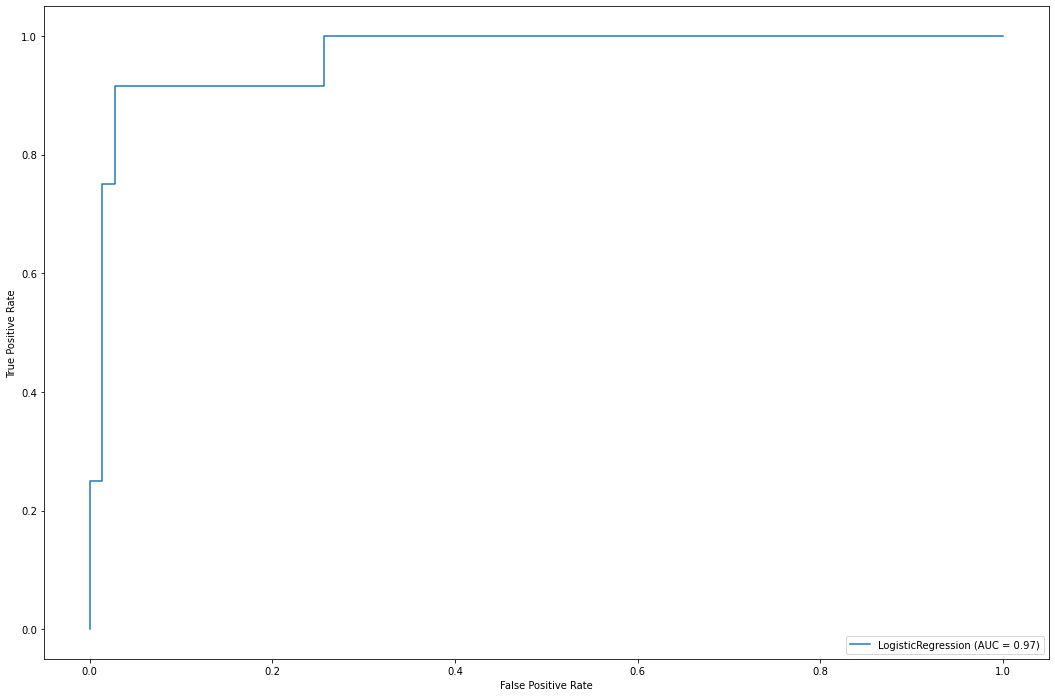

In [89]:
metrics.plot_roc_curve(lr, X_test, y_test)
plt.show()

# 3- Naïve Bayes

In [90]:
y_pred_naive = gb.predict(X_test)
print(classification_report(y_test, y_pred_naive))
print(f"confusion_matrix:{confusion_matrix(y_test, y_pred_naive)}")
print(f"f1_score={f1_score(y_test, y_pred_naive, average='binary')}")
print(f"roc_auc_score={roc_auc_score(y_test.to_numpy(), y_pred_naive)}")

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        74
           1       0.60      0.25      0.35        12

    accuracy                           0.87        86
   macro avg       0.74      0.61      0.64        86
weighted avg       0.85      0.87      0.85        86

confusion_matrix:[[72  2]
 [ 9  3]]
f1_score=0.35294117647058826
roc_auc_score=0.6114864864864865


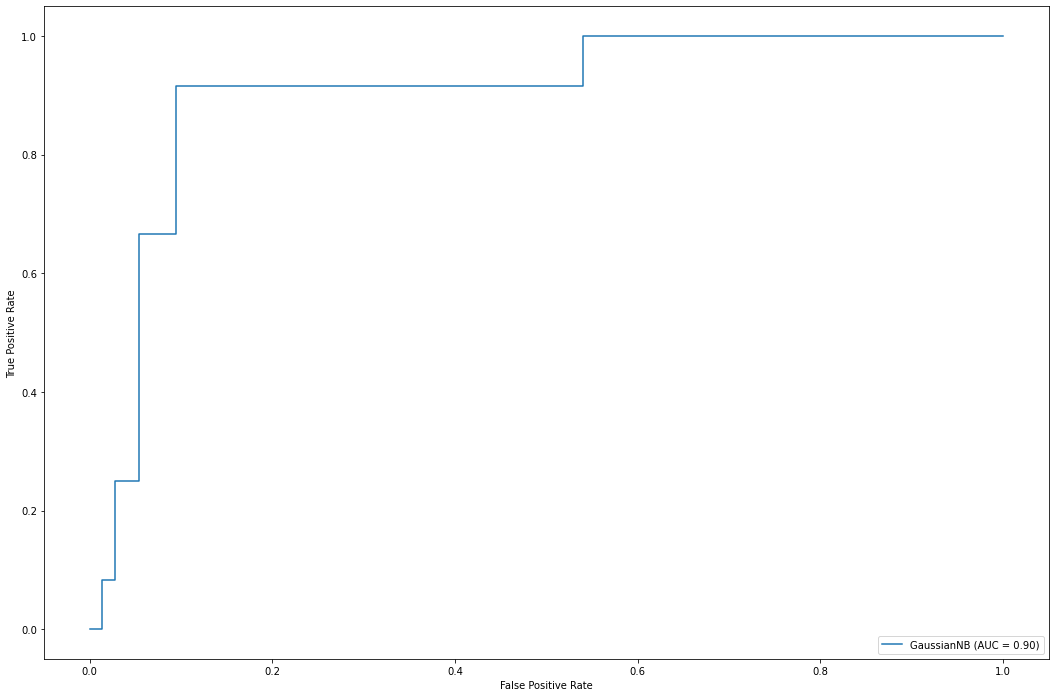

In [91]:
metrics.plot_roc_curve(gb, X_test, y_test)
plt.show()

# 4. Decision Trees

In [92]:
y_pred_DT = dtree.predict(X_test)
print(classification_report(y_test, y_pred_DT))
print(f"confusion_matrix:{confusion_matrix(y_test, y_pred_DT)}")
print(f"f1_score={f1_score(y_test, y_pred_DT, average='binary')}")
print(f"roc_auc_score={roc_auc_score(y_test.to_numpy(), y_pred_DT)}")

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.92      1.00      0.96        12

    accuracy                           0.99        86
   macro avg       0.96      0.99      0.98        86
weighted avg       0.99      0.99      0.99        86

confusion_matrix:[[73  1]
 [ 0 12]]
f1_score=0.9600000000000001
roc_auc_score=0.9932432432432433


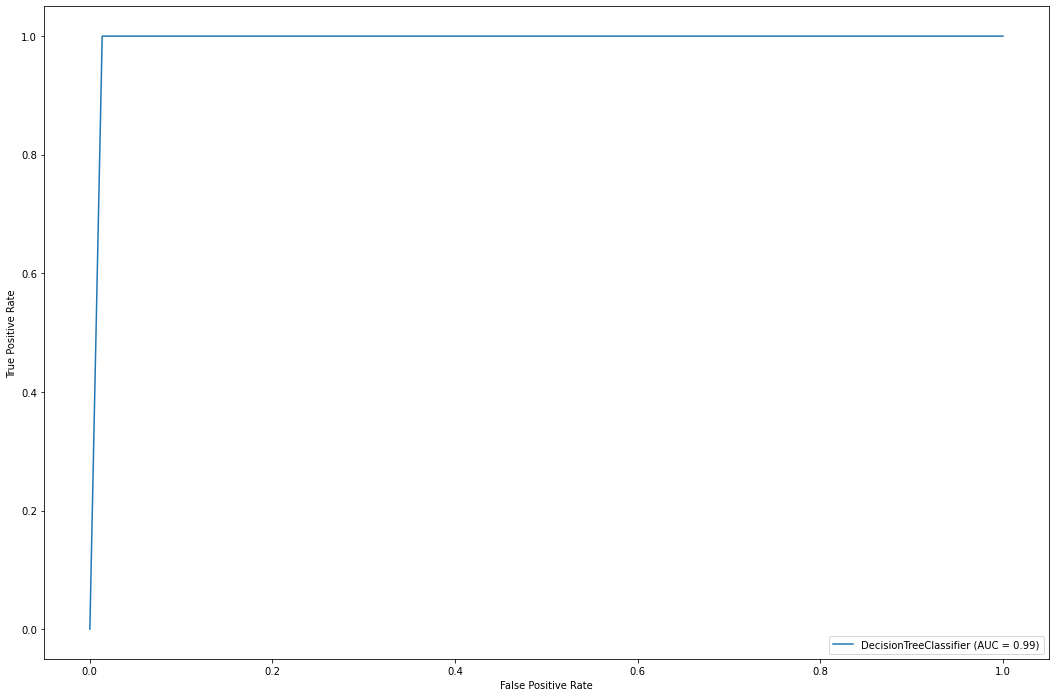

In [93]:
metrics.plot_roc_curve(dtree, X_test, y_test)
plt.show()

# 5- Support Vector Machines

In [94]:
y_pred_svm = svc.predict(X_test)
print(classification_report(y_test, y_pred_svm))
print(f"confusion_matrix:{confusion_matrix(y_test,y_pred_svm)}")
print(f"f1_score={f1_score(y_test, y_pred_svm, average='binary')}")
print(f"roc_auc_score={roc_auc_score(y_test.to_numpy(), y_pred_svm)}")

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.67      0.80        12

    accuracy                           0.95        86
   macro avg       0.97      0.83      0.89        86
weighted avg       0.96      0.95      0.95        86

confusion_matrix:[[74  0]
 [ 4  8]]
f1_score=0.8
roc_auc_score=0.8333333333333333


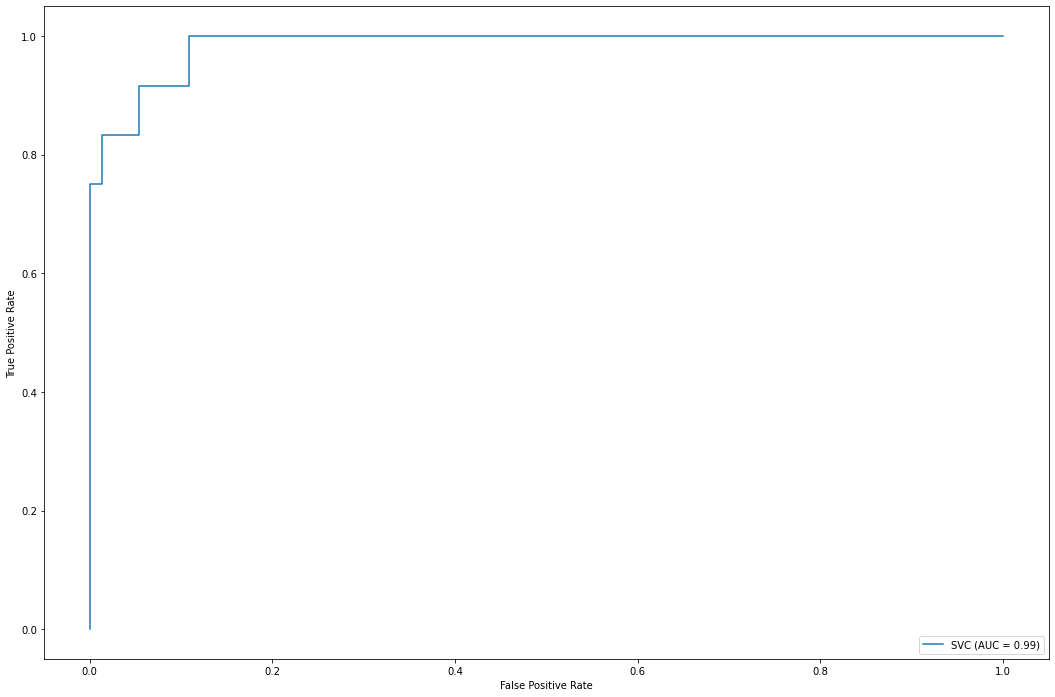

In [95]:
metrics.plot_roc_curve(svc, X_test, y_test)
plt.show()

In [98]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import precision_recall_curve
df = pd.DataFrame({
    'group': ['Log-Reg', 'Naive Bayes', 'KNN', 'DTree', 'SVM'],
    'f1_score': [f1_score(y_test, y_pred_log,average=('weighted')),  f1_score(y_test, y_pred_naive,average=('weighted')), f1_score(y_test, y_pred_knn,average=('weighted')), f1_score(y_test, y_pred_DT,average=('weighted')), f1_score(y_test, y_pred_svm,average=('weighted'))],
    'Precision': [precision_score(y_test, y_pred_log,average=('weighted')),  precision_score(y_test, y_pred_naive,average=('weighted')), precision_score(y_test, y_pred_knn,average=('weighted')), precision_score(y_test, y_pred_DT,average=('weighted')), precision_score(y_test, y_pred_svm,average=('weighted'))],
    'Recall': [recall_score(y_test, y_pred_log,average=('weighted')),  recall_score(y_test, y_pred_naive,average=('weighted')),  recall_score(y_test, y_pred_knn,average=('weighted')),  recall_score(y_test, y_pred_DT,average=('weighted')),  recall_score(y_test, y_pred_svm,average=('weighted'))],
    'AUC': [roc_auc_score(y_test, y_pred_log),  roc_auc_score(y_test, y_pred_naive),  roc_auc_score(y_test, y_pred_knn), roc_auc_score(y_test, y_pred_DT), roc_auc_score(y_test, y_pred_svm)],
    'Accuracy':  [accuracy_score(y_test, y_pred_log),  accuracy_score(y_test, y_pred_naive),  accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_DT), accuracy_score(y_test, y_pred_svm)]
})
df

,group,f1_score,Precision,Recall,AUC,Accuracy
0,Log-Reg,0.924174,0.927400,0.930233,0.784910,0.930233
1,Naive Bayes,0.848647,0.848579,0.872093,0.611486,0.872093
2,KNN,0.900080,0.907828,0.895349,0.834459,0.895349
3,DTree,0.988565,0.989267,0.988372,0.993243,0.988372
4,SVM,0.949449,0.955874,0.953488,0.833333,0.953488


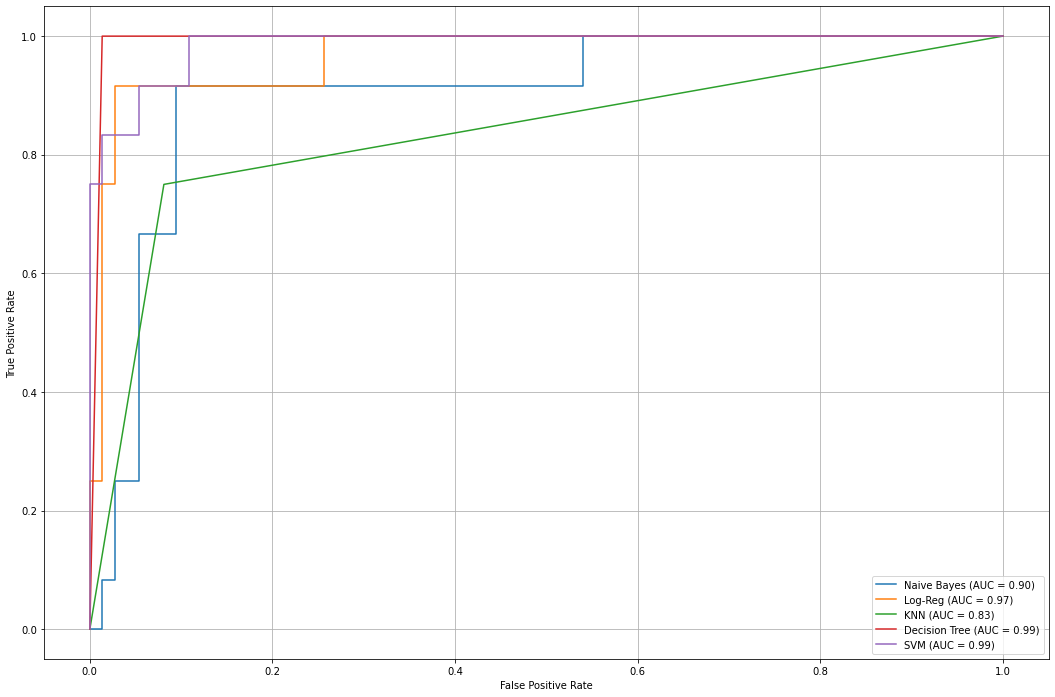

In [97]:
from sklearn.metrics import plot_roc_curve
display = plot_roc_curve(gb, X_test, y_test,name="Naive Bayes")
plot_roc_curve(lr, X_test, y_test, ax=display.ax_ ,name="Log-Reg")
plot_roc_curve(knn,X_test,y_test,ax=display.ax_,name="KNN")
plot_roc_curve(dtree,X_test,y_test,ax=display.ax_,name="Decision Tree")
plot_roc_curve(svc,X_test,y_test,ax=display.ax_,name="SVM")
plt.grid()
plt.show()